In [15]:
import numpy as np
import matplotlib.pyplot as plt
from historymatch import sample
from scipy.spatial import distance

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import math

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy



In [44]:
covariance = [[ 16.61637595, -34.66972865,  -2.55489732, -29.2434569 ],
 [-34.66972865,  73.7343475,    5.11023492,  59.06280164],
 [ -2.55489732,   5.11023492,   0.43009109,   4.58097248],
 [-29.2434569,   59.06280164,   4.58097248, 207.23557397]]

covariance2d = [[ 16.61637595, -34.66972865],
 [-34.66972865,  73.7343475]]

covariance3d = np.array([[ 16.61637595, -34.66972865,  -2.55489732],
 [-34.66972865,  73.7343475,    5.11023492],
 [ -2.55489732,   5.11023492,   0.43009109]])


mean = [0,0,0,0]
mean2d = [0,0]
mean3d = [0,0,0]
ndim = 3
Nsamples = 1000


sample1 = np.random.multivariate_normal(mean3d, covariance3d, 1000)

In [59]:
chisq_cov = 9.488*covariance3d

In [60]:
# generate well spaced samples centred on 0
bounds = np.concatenate((-np.ones(ndim).reshape(-1,1), np.ones(ndim).reshape(-1,1)), axis=1)
uniform_samples = sample.LHsampling(ndim, Nsamples, bounds)

_eigvals, eigvecs = np.linalg.eig(chisq_cov)

R = eigvecs.T                            # rotation matrix
S = np.eye(ndim)*np.sqrt(_eigvals)   # scaling matrix
#S = np.eye(ndim)*sorted_scale  # scaling matrix
T = np.dot(S, np.linalg.inv(R))          # tranformation matrix

# rotate and scale samples
parameter_samples = np.zeros((len(uniform_samples),ndim))
for i in range(len(uniform_samples)):
    parameter_samples[i] = np.dot(np.linalg.inv(R), np.dot(S, uniform_samples[i,:ndim]))

# recentre samples
for dim in range(ndim):
    parameter_samples[:,dim] += mean[dim]


In [61]:
3*2*np.sqrt(_eigvals)

array([175.77461075,  10.50931022,   0.81355812])

In [62]:
parameter_samples2 = np.zeros((len(uniform_samples),ndim))
for i in range(len(uniform_samples)):
    parameter_samples2[i] = np.dot(S, uniform_samples[i,:ndim])

-26.80853282107504


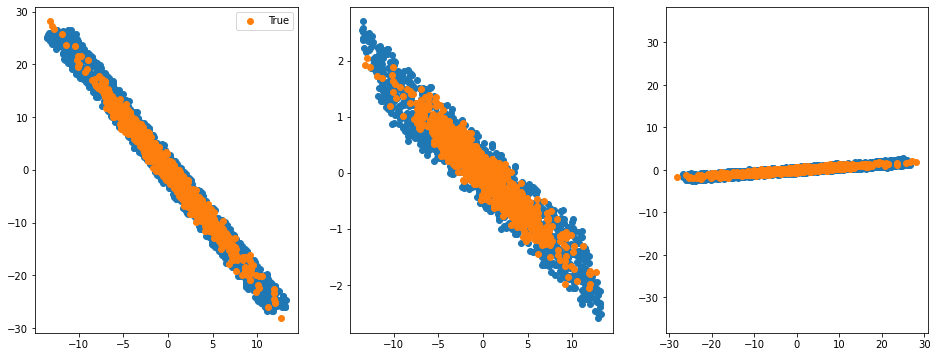

In [63]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,6))

ax1.scatter(parameter_samples[:,0], parameter_samples[:,1])
#ax1.scatter(parameter_samples2[:,1], parameter_samples2[:,0], label='Straight')
ax1.scatter(sample1[:,0], sample1[:,1], label='True')

ax2.scatter(parameter_samples[:,0], parameter_samples[:,2])
#ax2.scatter(parameter_samples2[:,2], parameter_samples2[:,1], label='Straight')
ax2.scatter(sample1[:,0], sample1[:,2])

ax3.scatter(parameter_samples[:,1], parameter_samples[:,2])
#ax3.scatter(parameter_samples2[:,0], parameter_samples2[:,2], label='Straight')
ax3.scatter(sample1[:,1], sample1[:,2])

plt.axis('equal')
ax1.legend(loc='best')


print(np.min(parameter_samples[:,1]))

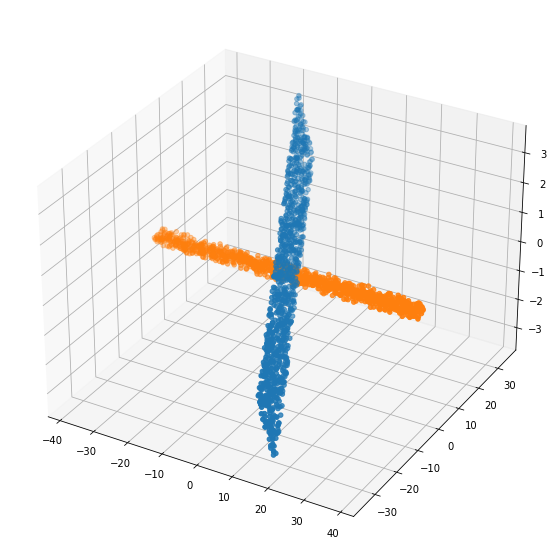

In [29]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter(parameter_samples[:,0], parameter_samples[:,1], parameter_samples[:,2])
ax.scatter(parameter_samples2[:,0], parameter_samples2[:,1], parameter_samples2[:,2], label='Straight')

In [8]:
50*3*3*100

45000

In [9]:
np.sqrt(34**2 + 36**2)

49.51767361255979

In [10]:
print(np.max(parameter_samples2, axis=0) - np.min(parameter_samples2, axis=0))

[57.0078018   3.40841417  0.26385585]


In [11]:
sample2 = np.random.multivariate_normal(mean2d, [[3,2],[2,2]], 1000)

# rotate and scale samples
parameter_samples4 = np.zeros((len(sample2),2))
for i in range(len(sample2)):
    parameter_samples4[i] = np.dot(R, sample2[i,:ndim])

ValueError: shapes (3,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,7))

ax1.scatter(parameter_samples4[:,0], parameter_samples4[:,1], label='Straight')
ax1.scatter(sample2[:,0], sample2[:,1], label='True')